In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Activation Functions

### 1) Sigmoid

Sigmoid takes a real value as input and outputs another value between 0 and 1. It’s easy to work with and has all the nice properties of activation functions: it’s non-linear, continuously differentiable, monotonic, and has a fixed output range.

mathematical expression:

f(x) = 1/(1+e^-x)

derivative:

f'(x)=f(x)(1-f(x))

python implementation:

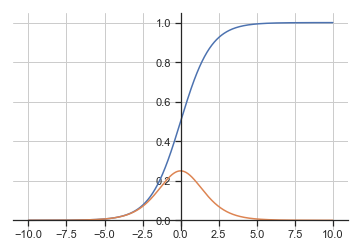

In [78]:
def sigmoid_function(x):
    z = (1/(1 + np.exp(-x)))
    return z

x=np.linspace(-10,10,1000)
sns.set(style='ticks')
fig, ax = plt.subplots()
ax.plot(x, sigmoid_function(x))
ax.plot(x, sigmoid_function(x)*(1-sigmoid_function(x)))
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

The gradient values are significant for range -3 and 3 but the graph gets much flatter in other regions. This implies that for values greater than 3 or less than -3, will have very small gradients. As the gradient value approaches zero, the network is not really learning. It gives rise to a problem of “vanishing gradients”

Uses

Usually used in output layer of a binary classification, where result is either 0 or 1, as value for sigmoid function lies between 0 and 1 only so, result can be predicted easily to be 1 if value is greater than 0.5 and 0 otherwise.

Pros
It is nonlinear in nature. Combinations of this function are also nonlinear!
It has a smooth gradient too.
It’s good for a classifier.
The output of the activation function is always going to be in range (0,1)
So we have our activations bound in a range. As it won’t blow up the activations then.

Cons

Towards either end of the sigmoid function, the Y values tend to respond very less to changes in X.
It gives rise to a problem of “vanishing gradients”.
Its output isn’t zero centered. It makes the gradient updates go too far in different directions. 0 < output < 1, and it makes optimization harder.
Sigmoids saturate and kill gradients.
The network refuses to learn further or is drastically slow ( depending on use case and until gradient /computation gets hit by floating point value limits ).

### 2) Tanh

The tanh function is very similar to the sigmoid function. The only difference is that it is symmetric around the origin. The range of values in this case is from -1 to 1. Thus the inputs to the next layers will not always be of the same sign.

mathematical expression:

f(x) = (e^x-e^-x)/(e^x+e^-x)

derivative:

f'(x)=(1-f(x)^2)

python implementation:

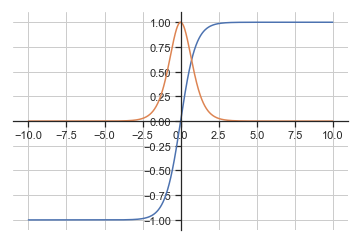

In [77]:
def tanh_function(x):
    z = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    return z

x=np.linspace(-10,10,1000)
sns.set(style='ticks')
fig, ax = plt.subplots()
ax.plot(x, tanh_function(x))
ax.plot(x, (1-np.square(tanh_function(x))))
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

Now it’s output is zero centered because its range in between -1 to 1 i.e -1 < output < 1 . Hence optimization is easier in this method hence in practice it is always preferred over Sigmoid function . But still it suffers from Vanishing gradient problem.

Uses

Usually used in hidden layers of a neural network as it’s values lies between -1 to 1 hence the mean for the hidden layer comes out be 0 or very close to it, hence helps in centering the data by bringing mean close to 0. This makes learning for the next layer much easier.

Pros

The gradient is stronger for tanh than sigmoid ( derivatives are steeper).

Cons

Tanh also has the vanishing gradient problem.

### 3) ReLU

ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

This means that the neurons will only be deactivated if the output of the linear transformation is less than 0. 

In [ ]:
mathematical expression:

f(x) = max(0, x)

derivative:

f'(x)=0 when x<0 
      1 when x>=0

python implementation:

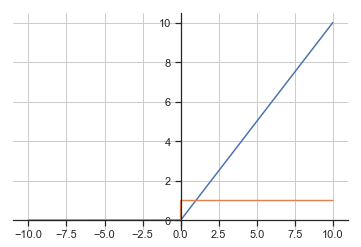

In [88]:
def relu_function(x):
    if x<0:
        return 0
    else:
        return x
def relu_derivative(x):
    if x<0:
        return 0
    else:
        return 1
x=np.linspace(-10,10,10001)
sns.set(style='ticks')
fig, ax = plt.subplots()
ax.plot(x, list(map(relu_function,x)))
ax.plot(x, list(map(relu_derivative,x)))
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

If you look at the negative side of the graph, you will notice that the gradient value is zero. Due to this reason, during the backpropogation process, the weights and biases for some neurons are not updated. This can create dead neurons which never get activated. This is taken care of by the ‘Leaky’ ReLU function

Uses

ReLU is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.

Pros

It avoids and rectifies vanishing gradient problem.
ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations.

Cons

One of its limitation is that it should only be used within Hidden layers of a Neural Network Model.
Some gradients can be fragile during training and can die. It can cause a weight update which will makes it never activate on any data point again. Simply saying that ReLu could result in Dead Neurons.
In another words, For activations in the region (x<0) of ReLu, gradient will be 0 because of which the weights will not get adjusted during descent. That means, those neurons which go into that state will stop responding to variations in error/ input ( simply because gradient is 0, nothing changes ). This is called dying ReLu problem.
The range of ReLu is [0, inf). This means it can blow up the activation.

### 4) Leaky ReLU

Leaky ReLU function is nothing but an improved version of the ReLU function. As we saw that for the ReLU function, the gradient is 0 for x<0, which would deactivate the neurons in that region.
Leaky ReLU is defined to address this problem. Instead of defining the Relu function as 0 for negative values of x, we define it as an extremely small linear component of x

mathematical expression:

f(x)=0.01x when x<0 
         x when x>=0

derivative:

f'(x)=0.01 when x<0 
      1    when x>=0

python implementation:

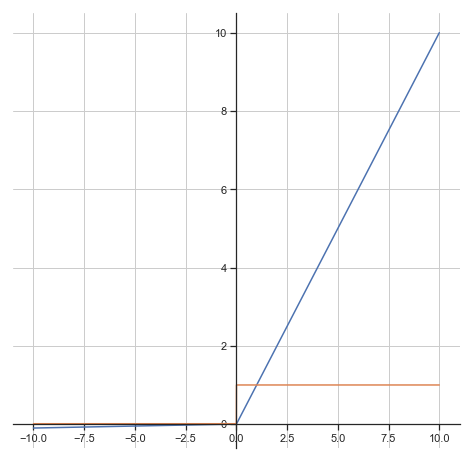

In [86]:
def leakyrelu_function(x):
    if x<0:
        return 0.01*x
    else:
        return x
def leakyrelu_derivative(x):
    if x<0:
        return 0.01
    else:
        return 1
x=np.linspace(-10,10,10001)
sns.set(style='ticks')
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, list(map(leakyrelu_function,x)))
ax.plot(x, list(map(leakyrelu_derivative,x)))
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

By making this small modification, the gradient of the left side of the graph comes out to be a non zero value. Hence we would no longer encounter dead neurons in that region

Pros

Leaky ReLUs are one attempt to fix the “dying ReLU” problem by having a small negative slope (of 0.01, or so).

Cons

As it possess linearity, it can’t be used for the complex Classification. It lags behind the Sigmoid and Tanh for some of the use cases.

### 5) Parameterised ReLU

This is another variant of ReLU that aims to solve the problem of gradient’s becoming zero for the left half of the axis. The parameterised ReLU, as the name suggests, introduces a new parameter as a slope of the negative part of the function

mathematical expression:

f(x)=  ax when x<0 
        x when x>=0

derivative:

f'(x)= a when x<0 
       1 when x>=0

python implementation:

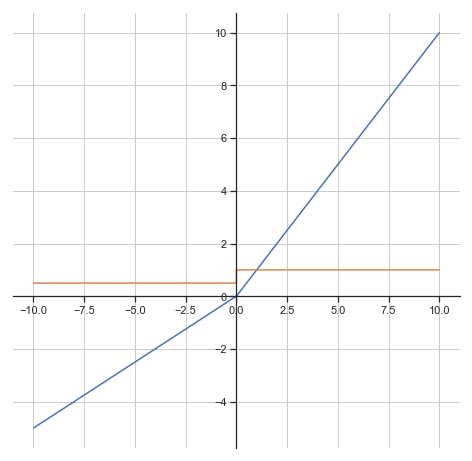

In [92]:
a=0.5
def parameterisedrelu_function(x):
    if x<0:
        return a*x
    else:
        return x
def parameterisedrelu_derivative(x):
    if x<0:
        return a
    else:
        return 1
x=np.linspace(-10,10,10001)
sns.set(style='ticks')
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, list(map(parameterisedrelu_function,x)))
ax.plot(x, list(map(parameterisedrelu_derivative,x)))
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

However, in case of a parameterised ReLU function, ‘a‘ is also a trainable parameter

Uses:
    
The parameterized ReLU function is used when the leaky ReLU function still fails to solve the problem of dead neurons and the relevant information is not successfully passed to the next layer.

Pros:

Same as LeakyRelu

Cons:

Same as LeakyRelu

### 6) Exponential ELU

Exponential Linear Unit or ELU for short is also a variant of Rectified Linear Unit (ReLU) that modifies the slope of the negative part of the function. Unlike the leaky relu and parametric ReLU functions, instead of a straight line, ELU uses a log curve for defning the negatice values

mathematical expression:

f(x)  =   x when x>0 
          a(e^x-1) when x<=0

derivative:

f'(x) =   1      when x>0 
          f(x)+a when x<=0

python implementation:

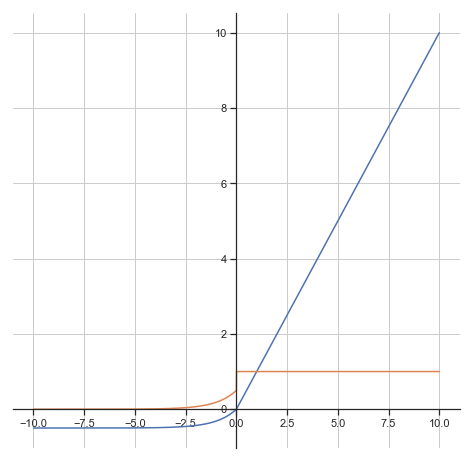

In [96]:
a=0.5
def elu_function(x):
    if x<=0:
        return a*(np.exp(x)-1)
    else:
        return x
def elu_derivative(x):
    if x<=0:
        return elu_function(x)+a
    else:
        return 1
x=np.linspace(-10,10,10001)
sns.set(style='ticks')
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, list(map(elu_function,x)))
ax.plot(x, list(map(elu_derivative,x)))
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

Exponential Linear Unit or its widely known name ELU is a function that tend to converge cost to zero faster and produce more accurate results. Different to other activation functions, ELU has a extra alpha constant which should be positive number.

ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.

Pros

ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.
ELU is a strong alternative to ReLU.
Unlike to ReLU, ELU can produce negative outputs.

Cons

For x > 0, it can blow up the activation with the output range of [0, inf].

### 7) Swish

Swish is a lesser known activation function which was discovered by researchers at Google. Swish is as computationally efficient as ReLU and shows better performance than ReLU on deeper models.  The values for swish ranges from negative infinity to infinity

mathematical expression:

f(x)  =   x.sigmoid(x)

derivative:

f'(x)= 1 + x -f(x)

python implementation:

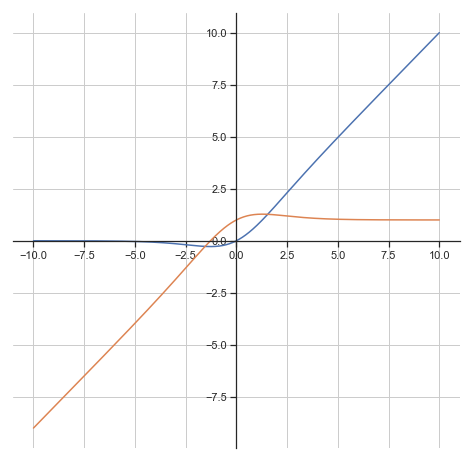

In [99]:
def swiss_function(x):
    z = (x/(1 + np.exp(-x)))
    return z
def swiss_derivative(x):
    return 1+x-swiss_function(x)
x=np.linspace(-10,10,1000)
sns.set(style='ticks')
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, list(map(swiss_function,x)))
ax.plot(x, list(map(swiss_derivative,x)))
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

As you can see, the curve of the function is smooth and the function is differentiable at all points. This is helpful during the model optimization process and is considered to be one of the reasons that swish outoerforms ReLU

Uses:

Swish outperforms ReLU on deep networks applied to a variety of challenging domains such as Image classification and Machine translation

Pros:

Swish is a smooth, non-monotonic function
It is unbounded above and bounded below & it is the non-monotonic attribute that actually creates the difference

Cons:
    
A unique fact about this function is that swich function is not monotonic. This means that the value of the function may decrease even when the input values are increasing

### 8) Softmax

Softmax function calculates the probabilities distribution of the event over ‘n’ different events. In general way of saying, this function will calculate the probabilities of each target class over all possible target classes. Later the calculated probabilities will be helpful for determining the target class for the given inputs.

mathematical expression:

f(x)  =   e^x_i/Sum(e^x_j)  for j = 1, …, J

Python implementation:

In [102]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x)) 

In [103]:
a = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
softmax_function(a)

array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])

Uses:

The softmax function can be used for multiclass classification problems. This function returns the probability for a datapoint belonging to each individual class

Pros:

Able to handle multiple classes only one class in other activation functions—normalizes the outputs for each class between 0 and 1, and divides by their sum, giving the probability of the input value being in a specific class.
Used for the classification of basic problems that are linearly separable.
Useful for output neurons—typically Softmax is used only for the output layer, for neural networks that need to classify inputs into multiple categories.
It consists of a very simple model and is therefore very fast to train and predict

Cons:

It will not work if your data is not linearly separable.


### 9) SoftPlus

This function is also called as Smooth Relu. Derivative of SoftPlus function is a sigmoid fucntion.

mathematical expression:

f(x)  =   ln(1 + e^x)

derivative:

f'(x)= 1 /(1 + e^(-x))

Python implementation:

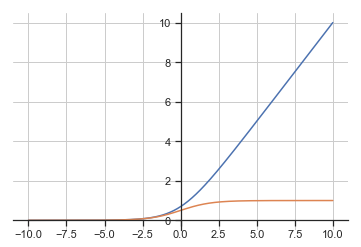

In [108]:
def softplus_function(x):
    z = np.log((1 + np.exp(x)))
    return z
def softplus_derivative(x):
    return 1/(1+np.exp(-x))
x=np.linspace(-10,10,1000)
sns.set(style='ticks')
fig, ax = plt.subplots()
ax.plot(x, list(map(softplus_function,x)))
ax.plot(x, list(map(softplus_derivative,x)))
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

### 10) Scaled exponential linear unit (SELU)

This is also one of the optimized ReLU function

mathematical expression:

f(x)  =   lambda.x          when x>0 
          lambda.a(e^x - 1) when x<=0

lambda = 1.0507
a = 1.67326

derivative:

f'(x) =   lambda          when x>0 
          f(x) + lambda.a when x<=0

In [ ]:
Python implementation:

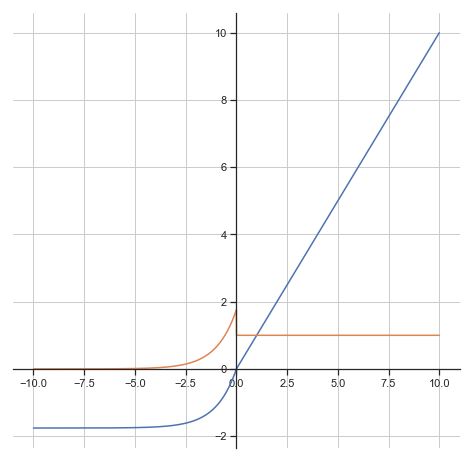

In [109]:
l=1.0507
a=1.67326
def selu_function(x):
    if x<=0:
        return l*a*(np.exp(x)-1)
    else:
        return x
def selu_derivative(x):
    if x<=0:
        return selu_function(x)+(a*l)
    else:
        return 1
x=np.linspace(-10,10,10001)
sns.set(style='ticks')
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, list(map(selu_function,x)))
ax.plot(x, list(map(selu_derivative,x)))
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

Pros:

Stable and demonstrates higher performance


Cons:

Unstable on standardized data

# Loss Functions

## 1) Regression Loss Functions


### 1) Mean Squared Error Loss

The Mean Squared Error, or MSE, loss is the default loss to use for regression problems.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. It is the loss function to be evaluated first and only changed if you have a good reason.

Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes.

The mean squared error loss function can be used in Keras by specifying ‘mse‘ or ‘mean_squared_error‘ as the loss function when compiling the model.

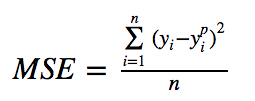

## 2)Root Mean Squared Logarithmic Error Loss

There may be regression problems in which the target value has a spread of values and when predicting a large value, you may not want to punish a model as heavily as mean squared error.

Instead, you can first calculate the natural logarithm of each of the predicted values, then calculate the mean squared error. This is called the Mean Squared Logarithmic Error loss, or MSLE for short.

It has the effect of relaxing the punishing effect of large differences in large predicted values.

As a loss measure, it may be more appropriate when the model is predicting unscaled quantities directly. Nevertheless, we can demonstrate this loss function using our simple regression problem.

The model can be updated to use the ‘root mean_squared_logarithmic_error‘ loss function and keep the same configuration for the output layer. We will also track the mean squared error as a metric when fitting the model so that we can use it as a measure of performance and plot the learning curve.

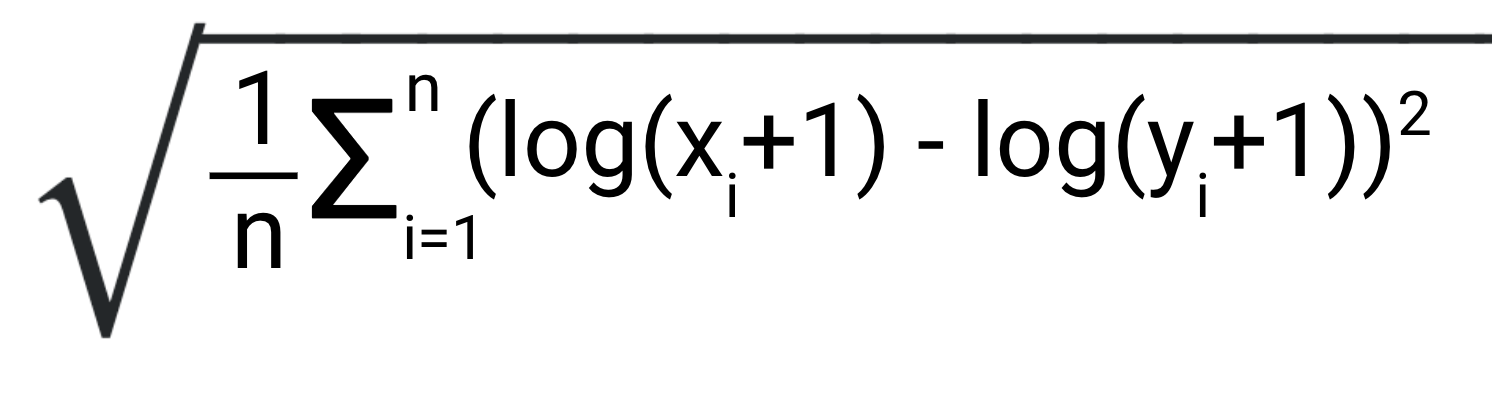

### 3) Mean Absolute Error Loss

On some regression problems, the distribution of the target variable may be mostly Gaussian, but may have outliers, e.g. large or small values far from the mean value.

The Mean Absolute Error, or MAE, loss is an appropriate loss function in this case as it is more robust to outliers. It is calculated as the average of the absolute difference between the actual and predicted values.

The model can be updated to use the ‘mean_absolute_error‘ loss function and keep the same configuration for the output layer.

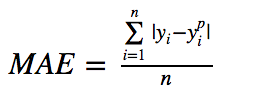

### 4) Quantile Loss

In most of the real world prediction problems, we are often interested to know about the uncertainty in our predictions. Knowing about the range of predictions as opposed to only point estimates can significantly improve decision making processes for many business problems.
Quantile loss functions turn out to be useful when we are interested in predicting an interval instead of only point predictions. Prediction interval from least square regression is based on an assumption that residuals (y — y_hat) have constant variance across values of independent variables. We can not trust linear regression models which violate this assumption. We can not also just throw away the idea of fitting linear regression model as baseline by saying that such situations would always be better modeled using non-linear functions or tree based models. This is where quantile loss and quantile regression come to rescue as regression based on quantile loss provides sensible prediction intervals even for residuals with non-constant variance or non-normal distribution.

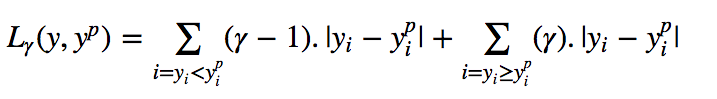

## 2) Binary Classification Loss Functions

### 1) Binary Cross-Entropy Loss

Cross-entropy is the default loss function to use for binary classification problems.

It is intended for use with binary classification where the target values are in the set {0, 1}.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.

Cross-entropy can be specified as the loss function in Keras by specifying ‘binary_crossentropy‘ when compiling the model.

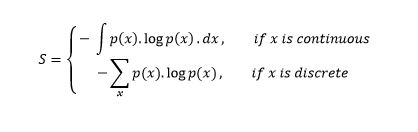

### 2) Hinge Loss

An alternative to cross-entropy for binary classification problems is the hinge loss function, primarily developed for use with Support Vector Machine (SVM) models.

It is intended for use with binary classification where the target values are in the set {-1, 1}.

The hinge loss function encourages examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class values.

Reports of performance with the hinge loss are mixed, sometimes resulting in better performance than cross-entropy on binary classification problems.

Firstly, the target variable must be modified to have values in the set {-1, 1}

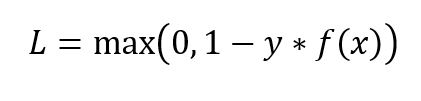

### 3) Squared Hinge Loss

The hinge loss function has many extensions, often the subject of investigation with SVM models.

A popular extension is called the squared hinge loss that simply calculates the square of the score hinge loss. It has the effect of smoothing the surface of the error function and making it numerically easier to work with.

If using a hinge loss does result in better performance on a given binary classification problem, is likely that a squared hinge loss may be appropriate.

As with using the hinge loss function, the target variable must be modified to have values in the set {-1, 1}.

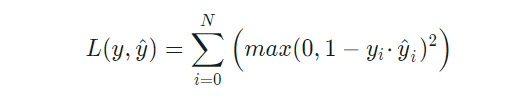

## 3) Multi-Class Classification Loss Functions

### 1) Multi-Class Cross-Entropy Loss

Cross-entropy is the default loss function to use for multi-class classification problems.

In this case, it is intended for use with multi-class classification where the target values are in the set {0, 1, 3, …, n}, where each class is assigned a unique integer value.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.

Cross-entropy can be specified as the loss function in Keras by specifying ‘categorical_crossentropy‘ when compiling the model.

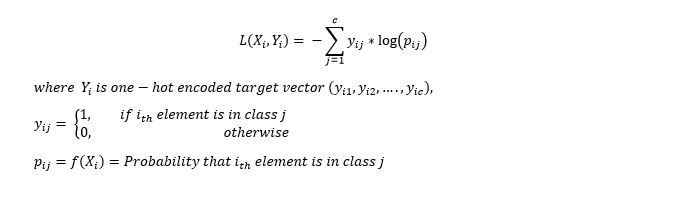

### 2) Sparse Multiclass Cross-Entropy Loss

A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one hot encoding process.

For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.

Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to training.

Sparse cross-entropy can be used in keras for multi-class classification by using ‘sparse_categorical_crossentropy‘ when calling the compile() function.

### 3) Kullback Leibler Divergence Loss

Kullback Leibler Divergence, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution.

A KL divergence loss of 0 suggests the distributions are identical. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution.

As such, the KL divergence loss function is more commonly used when using models that learn to approximate a more complex function than simply multi-class classification, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be preferred. Nevertheless, it can be used for multi-class classification, in which case it is functionally equivalent to multi-class cross-entropy.

KL divergence loss can be used in Keras by specifying ‘kullback_leibler_divergence‘ in the compile() function.

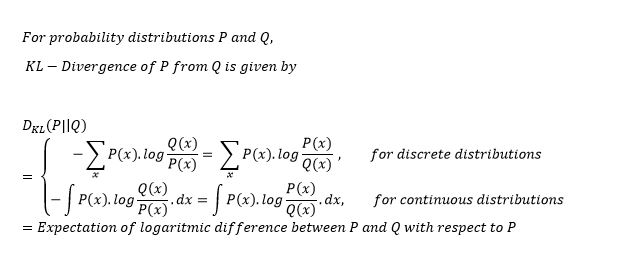